   Year  No of Accidents  Derailments  Collisions  Collisions at LC  \
0  2016                6            4           1                 0   
1  2017                3            2           0                 1   
2  2018                3            1           2                 0   
3  2019                5            4           0                 0   
4  2020                7            3           2                 2   

   Fire Accidents  
0               1  
1               0  
2               0  
3               1  
4               0  
Year                0
No of Accidents     0
Derailments         0
Collisions          0
Collisions at LC    0
Fire Accidents      0
dtype: int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        1
Model Family:                 Poisson   Df Model:                      

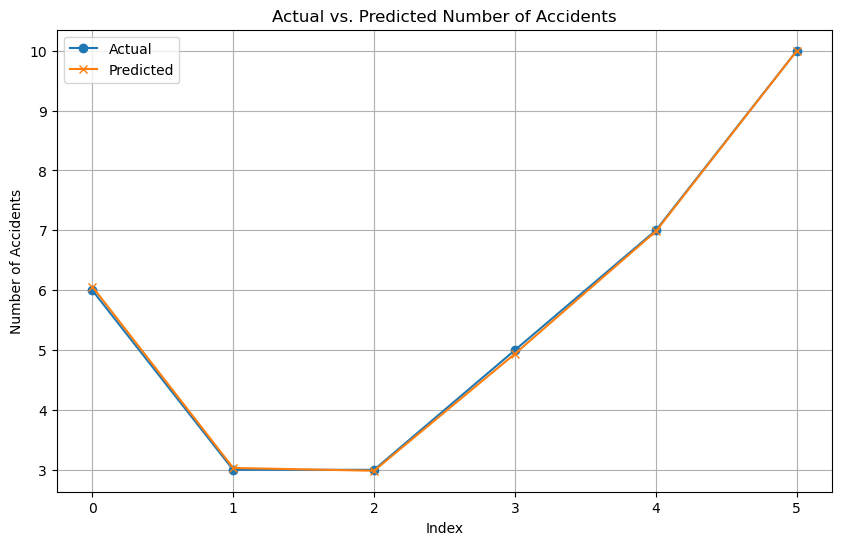

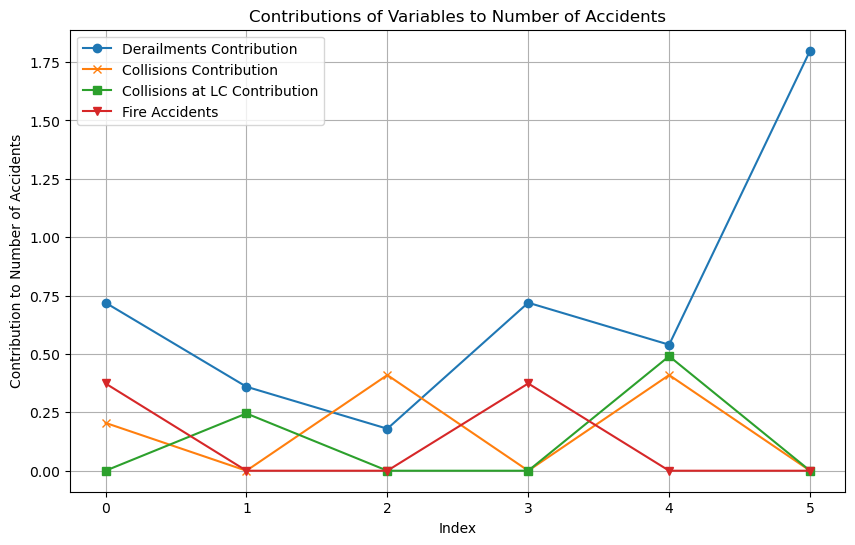

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'accident types'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Inspect the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data cleaning (if necessary)
# For example, fill missing values
df = df.fillna(method='ffill')

# Define the dependent (response) and independent (predictor) variables
X = df[['Derailments', 'Collisions', 'Collisions at LC','Fire Accidents']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with a Poisson distribution and log link function
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_results = glm_poisson.fit()
summary = glm_poisson_results.summary()
print(summary)

# Deviance and AIC are directly available
print(f"Deviance: {glm_poisson_results.deviance}")
print(f"AIC: {glm_poisson_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_poisson_results.null_deviance
pseudo_r_squared = 1 - (glm_poisson_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Generate predicted values from the model
df['Predicted_No_of_Accidents'] = glm_poisson_results.predict(X)

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['No of Accidents'], label='Actual', marker='o')
plt.plot(df.index, df['Predicted_No_of_Accidents'], label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Number of Accidents')
plt.title('Actual vs. Predicted Number of Accidents')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted_accidents.png')
plt.show()

# Plotting contributions of each variable
plt.figure(figsize=(10, 6))

# Derailments
plt.plot(df.index, df['Derailments'] * glm_poisson_results.params['Derailments'], label='Derailments Contribution', marker='o')

# Collisions
plt.plot(df.index, df['Collisions'] * glm_poisson_results.params['Collisions'], label='Collisions Contribution', marker='x')

# Collisions at LC
plt.plot(df.index, df['Collisions at LC'] * glm_poisson_results.params['Collisions at LC'], label='Collisions at LC Contribution', marker='s')
plt.plot(df.index, df['Fire Accidents'] * glm_poisson_results.params['Fire Accidents'], label='Fire Accidents', marker='v')

plt.xlabel('Index')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents.png')
plt.show()


   Year  No of Accidents  Accidents at Track  Accidents in Station Limits
0  2016                6                   6                            0
1  2017                3                   2                            1
2  2018                3                   2                            1
3  2019                5                   4                            1
4  2020                7                   6                            1
Year                           0
No of Accidents                0
Accidents at Track             0
Accidents in Station Limits    0
dtype: int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:         

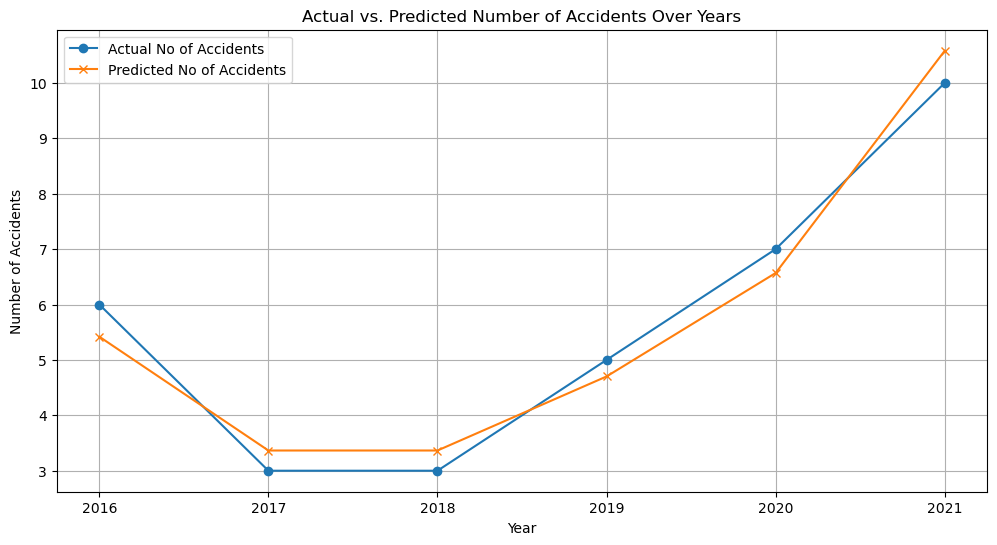

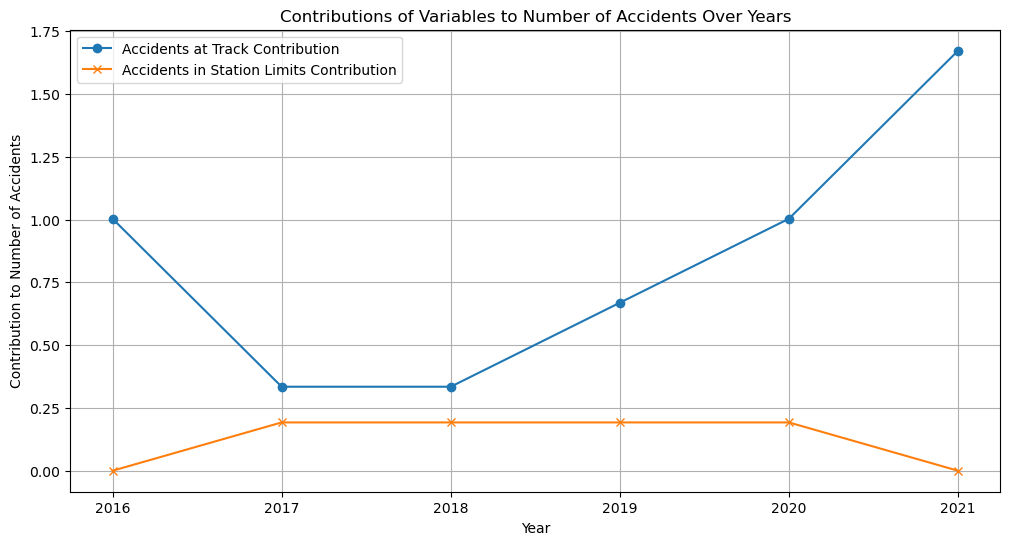

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'Location of Accidents'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Inspect the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data cleaning (if necessary)
# For example, fill missing values
df = df.fillna(method='ffill')

# Define the dependent (response) and independent (predictor) variables
X = df[['Accidents at Track', 'Accidents in Station Limits']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with Poisson distribution and log link function
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_results = glm_poisson.fit()
summary = glm_poisson_results.summary()
print(summary)

# Deviance and AIC are directly available
print(f"Deviance: {glm_poisson_results.deviance}")
print(f"AIC: {glm_poisson_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_poisson_results.null_deviance
pseudo_r_squared = 1 - (glm_poisson_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Generate predicted values from the model
df['Predicted_No_of_Accidents'] = glm_poisson_results.predict(X)

# Plotting the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['No of Accidents'], label='Actual No of Accidents', marker='o')
plt.plot(df['Year'], df['Predicted_No_of_Accidents'], label='Predicted No of Accidents', marker='x')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Actual vs. Predicted Number of Accidents Over Years')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted_accidents_location.png')
plt.show()

# Plotting contributions of each variable
plt.figure(figsize=(12, 6))

# Accidents at Track
plt.plot(df['Year'], df['Accidents at Track'] * glm_poisson_results.params['Accidents at Track'], label='Accidents at Track Contribution', marker='o')

# Accidents in Station Limits
plt.plot(df['Year'], df['Accidents in Station Limits'] * glm_poisson_results.params['Accidents in Station Limits'], label='Accidents in Station Limits Contribution', marker='x')

plt.xlabel('Year')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents Over Years')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents_location.png')
plt.show()


        Section  Main_Line  Branch_Line
0      QTA- BLN          8            0
1  QTA- DLH-ZHN         21            0
2      CHM- QTA          0            5
3    BSL to RWP          0           14
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46.910
Date:                Sat, 03 Aug 2024   Deviance:                       77.021
Time:                        18:48:47   Pearson chi2:                     68.2
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2307
Covariance Type:            nonrobust                                         
          

<Figure size 1000x600 with 0 Axes>

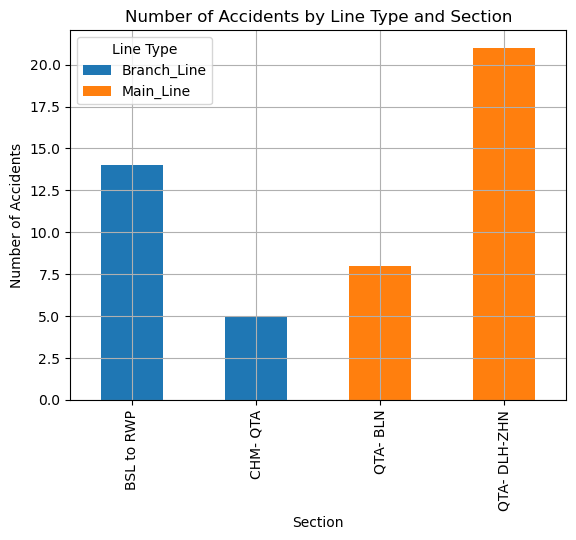

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'type of line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Reshape the data to a long format
df_long = pd.melt(df, id_vars=['Section'], value_vars=['Main_Line', 'Branch_Line'], 
                   var_name='Line_Type', value_name='No_of_Accidents')
print(df)
# Convert 'Line_Type' to a categorical variable
df_long['Line_Type'] = df_long['Line_Type'].astype('category')

# Fit the GLM
model = glm('No_of_Accidents ~ Line_Type', 
            data=df_long,
            family=sm.families.Poisson()).fit()

# Print the summary of the model
print(model.summary())

# Print AIC and Deviance
print(f"Deviance: {model.deviance}")
print(f"AIC: {model.aic}")

# Plotting the actual values for each type of line
plt.figure(figsize=(10, 6))
df_pivot = df_long.pivot(index='Section', columns='Line_Type', values='No_of_Accidents')
df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Section')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Line Type and Section')
plt.legend(title='Line Type')
plt.grid(True)
plt.savefig('accidents_by_line_and_section.png')
plt.show()


In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'type of line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Define the dependent (response) variable and independent (predictor) variables
X = df[['Main_Line', 'Branch_Line']]
y = df['No_of_Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with Poisson distribution and log link function
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_results = glm_poisson.fit()

# Print the summary of the model
print(glm_poisson_results.summary())

# Deviance and AIC are directly available
print(f"Deviance: {glm_poisson_results.deviance}")
print(f"AIC: {glm_poisson_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_poisson_results.null_deviance
pseudo_r_squared = 1 - (glm_poisson_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")



                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    4
Model:                            GLM   Df Residuals:                        1
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.5188
Date:                Sat, 03 Aug 2024   Deviance:                      0.23967
Time:                        23:33:41   Pearson chi2:                    0.238
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9543
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2902      0.452      2.854      

        Section  Main Line  Branch Line  No of Accidents
0      QTA- BLN          8            0                8
1  QTA- DLH-ZHN         21            0               21
2      CHM- QTA          0            5                5
3    BSL to RWP          0           14               14
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    4
Model:                            GLM   Df Residuals:                        1
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.5188
Date:                Sat, 03 Aug 2024   Deviance:                      0.23967
Time:                        23:43:46   Pearson chi2:                    0.238
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9543
Cova

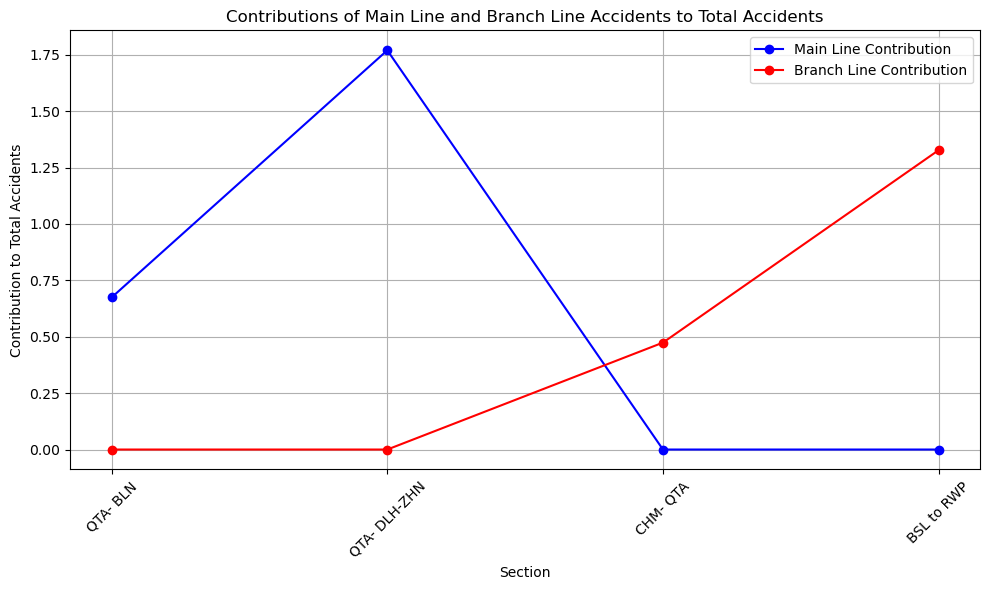

In [6]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'type of line'
df = pd.read_excel(file_path, sheet_name=sheet_name)
print(df)
# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Define the dependent (response) variable and independent (predictor) variables
X = df[['Main_Line', 'Branch_Line']]
y = df['No_of_Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with Poisson distribution and log link function
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_results = glm_poisson.fit()

# Print the summary of the model
print(glm_poisson_results.summary())

# Deviance and AIC are directly available
print(f"Deviance: {glm_poisson_results.deviance}")
print(f"AIC: {glm_poisson_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_poisson_results.null_deviance
pseudo_r_squared = 1 - (glm_poisson_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Plotting the contributions of Main Line and Branch Line to total accidents
df['Main_Line_Contribution'] = df['Main_Line'] * glm_poisson_results.params['Main_Line']
df['Branch_Line_Contribution'] = df['Branch_Line'] * glm_poisson_results.params['Branch_Line']

plt.figure(figsize=(10, 6))
plt.plot(df['Section'], df['Main_Line_Contribution'], marker='o', linestyle='-', color='b', label='Main Line Contribution')
plt.plot(df['Section'], df['Branch_Line_Contribution'], marker='o', linestyle='-', color='r', label='Branch Line Contribution')
plt.xlabel('Section')
plt.ylabel('Contribution to Total Accidents')
plt.title('Contributions of Main Line and Branch Line Accidents to Total Accidents')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('contributions_to_total_accidents.png')
plt.show()


   Year  No_of_Accidents  Passenager_train  Goods_Train
0  2016                6                 3            3
1  2017                3                 2            1
2  2018                3                 1            2
3  2019                5                 1            4
4  2020                7                 4            3
5  2021               10                 1            9
GLM Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.608
Date:                Sat, 03 Aug 2024   Deviance:                      0.12914
Time:                        23:55:0

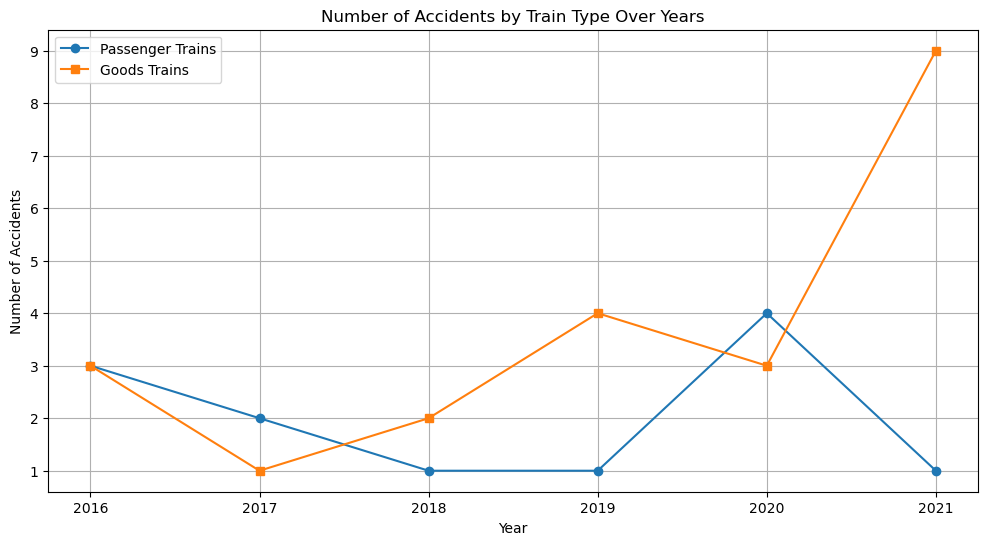

In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'Types of Train'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')
print(df)
# Prepare data for GLM
# Define the dependent variable and independent variables
X = df[['Passenager_train', 'Goods_Train']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the GLM model with Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary
print("GLM Model Summary:")
print(results.summary())

# Print additional metrics
print(f"Deviance: {results.deviance}")
print(f"AIC: {results.aic}")

# Calculate and print Pseudo R-squared (McFadden)
null_model = sm.GLM(y, sm.add_constant(pd.DataFrame({'const': [1] * len(y)})), family=sm.families.Poisson()).fit()
null_deviance = null_model.deviance
pseudo_r_squared = 1 - (results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Plotting the number of accidents by train type over years
plt.figure(figsize=(12, 6))

# Plot number of accidents for Passenger trains
plt.plot(df['Year'], df['Passenager_train'], marker='o', label='Passenger Trains')

# Plot number of accidents for Goods trains
plt.plot(df['Year'], df['Goods_Train'], marker='s', label='Goods Trains')

plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Train Type Over Years')
plt.legend()
plt.grid(True)
plt.xticks(df['Year'])  # Ensure all years are shown on the x-axis
plt.savefig('accidents_by_train_type_over_years.png')
plt.show()


   Year  No_of_Accidents  No_Damge_to_PR  Cause_Damge_to_PR  Cost_of_Damage
0  2016                6               0                  6         1550000
1  2017                3               2                  1          301000
2  2018                3               0                  3         9600000
3  2019                5               3                  2         2700000
4  2020                7               5                  2         4500000
5  2021               10               2                  8         1175000
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1

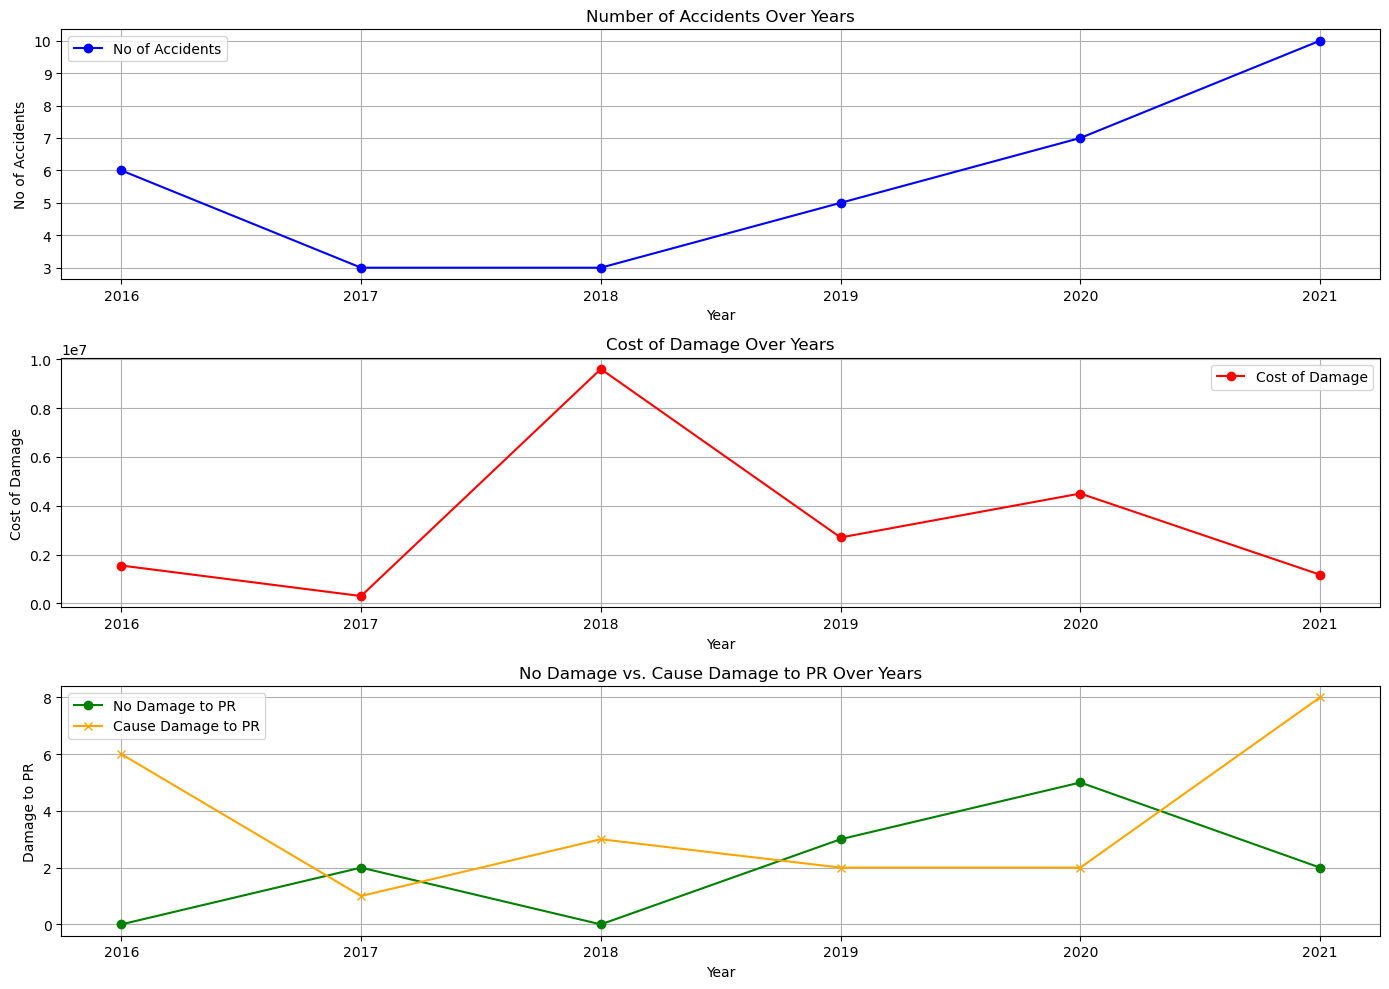

In [11]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'Cost of Damage'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Verify the updated column names
print(df)  # Should now show the names with underscores

# Prepare data for GLM
# Define the dependent variable (Cost_of_Damage) and independent variables
X = df[['Cost_of_Damage', 'No_Damge_to_PR', 'Cause_Damge_to_PR']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the GLM model with Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())

# Extract and print model metrics
deviance = results.deviance
aic = results.aic
pseudo_r_squared = 1 - (deviance / results.null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

print(f"Deviance: {deviance}")
print(f"AIC: {aic}")
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Plotting the graphs

# Plot 1: Number of Accidents and Cost of Damage over Years
plt.figure(figsize=(14, 10))

# Number of Accidents
plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['No_of_Accidents'], marker='o', label='No of Accidents', color='blue')
plt.xlabel('Year')
plt.ylabel('No of Accidents')
plt.title('Number of Accidents Over Years')
plt.grid(True)
plt.legend()

# Cost of Damage
plt.subplot(3, 1, 2)
plt.plot(df['Year'], df['Cost_of_Damage'], marker='o', label='Cost of Damage', color='red')
plt.xlabel('Year')
plt.ylabel('Cost of Damage')
plt.title('Cost of Damage Over Years')
plt.grid(True)
plt.legend()

# Comparisons
plt.subplot(3, 1, 3)
plt.plot(df['Year'], df['No_Damge_to_PR'], marker='o', label='No Damage to PR', color='green')
plt.plot(df['Year'], df['Cause_Damge_to_PR'], marker='x', label='Cause Damage to PR', color='orange')
plt.xlabel('Year')
plt.ylabel('Damage to PR')
plt.title('No Damage vs. Cause Damage to PR Over Years')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('cost_of_damage_analysis.png')
plt.show()


   Year  No_of_Accidents  No_Casulties  Casulties  No_of_Deaths  \
0  2016                6             4          2             6   
1  2017                3             2          1             2   
2  2018                3             2          1             0   
3  2019                5             4          1             0   
4  2020                7             5          2             1   
5  2021               10            10          0             0   

   No_of_Injuries  
0              26  
1               1  
2               2  
3               1  
4               2  
5               0  

Model Summary for Number of Casualties:
                 Generalized Linear Model Regression Results                  
Dep. Variable:           No_Casulties   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poisson   Df Model:                            1
Link Function:                   

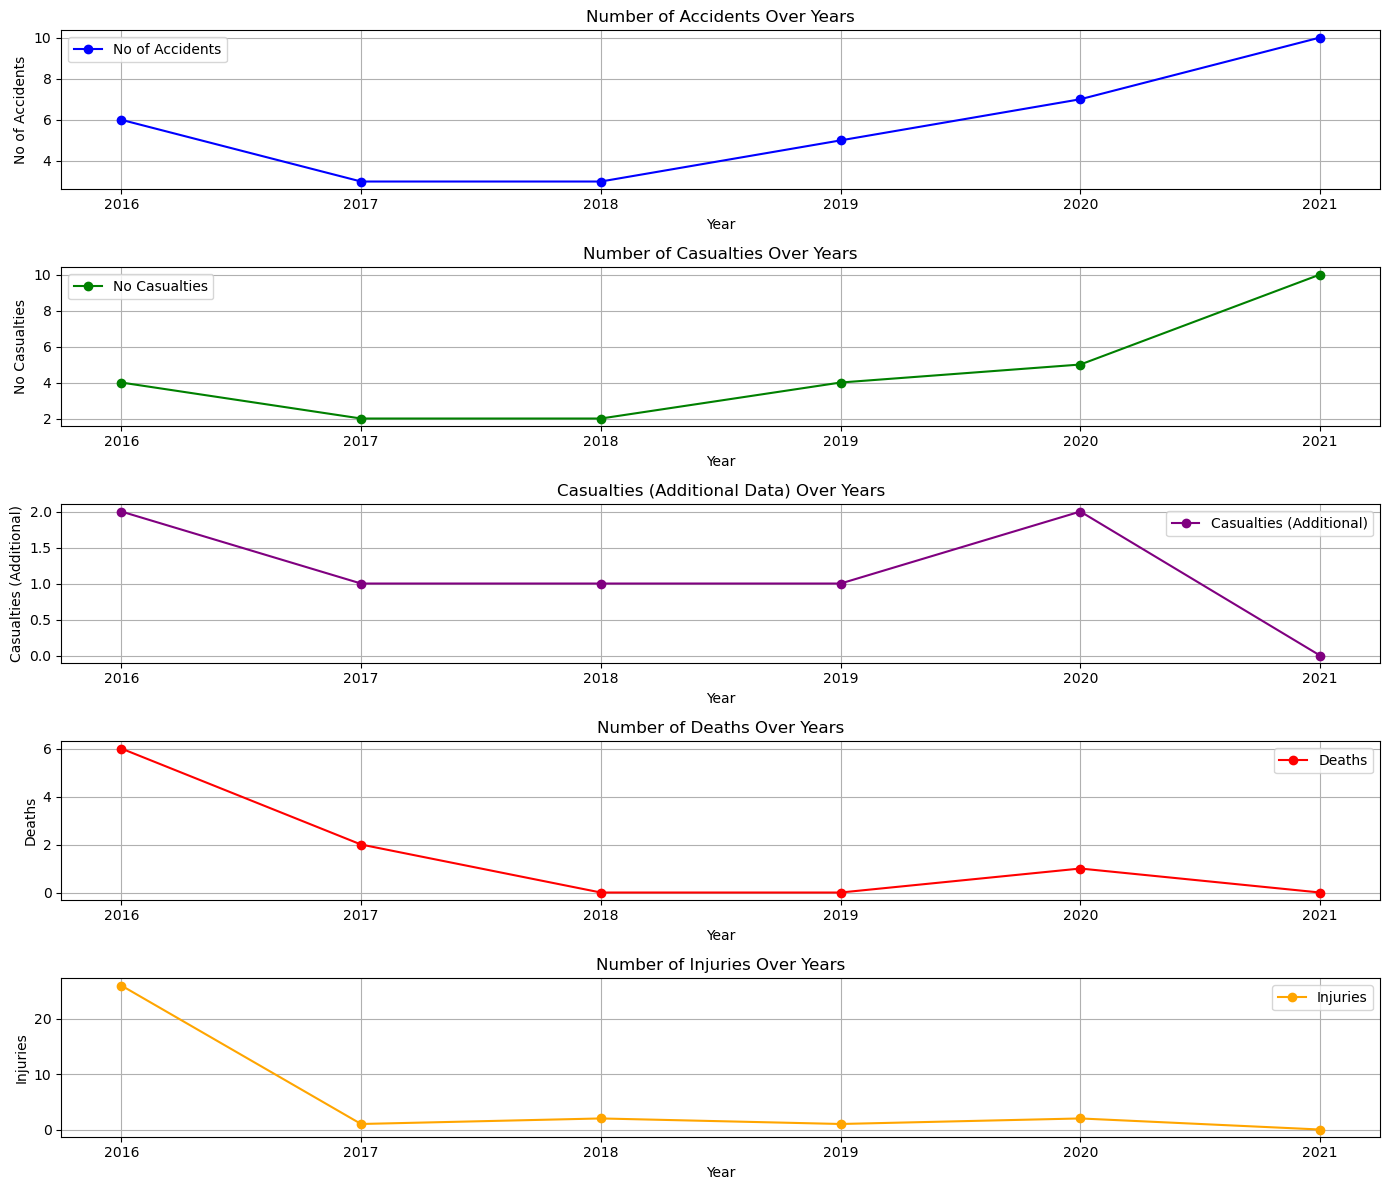

In [13]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'Severity'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rename columns to remove extra spaces and make them consistent
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Verify column names after renaming
print(df)

# Define dependent variables and independent variable
X = df[['No_of_Accidents']]
y_casualties = df['No_Casulties']
y_casualties_alt = df['Casulties']
y_deaths = df['No_of_Deaths']
y_injuries = df['No_of_Injuries']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit GLM model for each severity measure
model_casualties = sm.GLM(y_casualties, X, family=sm.families.Poisson()).fit()
model_casualties_alt = sm.GLM(y_casualties_alt, X, family=sm.families.Poisson()).fit()
model_deaths = sm.GLM(y_deaths, X, family=sm.families.Poisson()).fit()
model_injuries = sm.GLM(y_injuries, X, family=sm.families.Poisson()).fit()

# Print the summary for each model
print("\nModel Summary for Number of Casualties:")
print(model_casualties.summary())

print(f"Deviance: {model_casualties.deviance}")
print(f"AIC: {model_casualties.aic}")
print(f"Log-Likelihood: {model_casualties.llf}")

print("\nModel Summary for Number of Casualties (Alternative):")
print(model_casualties_alt.summary())

print(f"Deviance: {model_casualties_alt.deviance}")
print(f"AIC: {model_casualties_alt.aic}")
print(f"Log-Likelihood: {model_casualties_alt.llf}")

print("\nModel Summary for Number of Deaths:")
print(model_deaths.summary())

print(f"Deviance: {model_deaths.deviance}")
print(f"AIC: {model_deaths.aic}")
print(f"Log-Likelihood: {model_deaths.llf}")

print("\nModel Summary for Number of Injuries:")
print(model_injuries.summary())

print(f"Deviance: {model_injuries.deviance}")
print(f"AIC: {model_injuries.aic}")
print(f"Log-Likelihood: {model_injuries.llf}")

# Plotting the graphs

# Plot 1: Number of Accidents, Casualties, Deaths, and Injuries over Years
plt.figure(figsize=(14, 12))

# Number of Accidents
plt.subplot(5, 1, 1)
plt.plot(df['Year'], df['No_of_Accidents'], marker='o', label='No of Accidents', color='blue')
plt.xlabel('Year')
plt.ylabel('No of Accidents')
plt.title('Number of Accidents Over Years')
plt.grid(True)
plt.legend()

# Number of Casualties
plt.subplot(5, 1, 2)
plt.plot(df['Year'], df['No_Casulties'], marker='o', label='No Casualties', color='green')
plt.xlabel('Year')
plt.ylabel('No Casualties')
plt.title('Number of Casualties Over Years')
plt.grid(True)
plt.legend()

# Casualties (Additional Data)
plt.subplot(5, 1, 3)
plt.plot(df['Year'], df['Casulties'], marker='o', label='Casualties (Additional)', color='purple')
plt.xlabel('Year')
plt.ylabel('Casualties (Additional)')
plt.title('Casualties (Additional Data) Over Years')
plt.grid(True)
plt.legend()

# Number of Deaths
plt.subplot(5, 1, 4)
plt.plot(df['Year'], df['No_of_Deaths'], marker='o', label='Deaths', color='red')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Number of Deaths Over Years')
plt.grid(True)
plt.legend()

# Number of Injuries
plt.subplot(5, 1, 5)
plt.plot(df['Year'], df['No_of_Injuries'], marker='o', label='Injuries', color='orange')
plt.xlabel('Year')
plt.ylabel('Injuries')
plt.title('Number of Injuries Over Years')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('severity_analysis_all.png')
plt.show()


   Season  No_of_Accidents
0  Winter                8
1  Spring                5
2  Summer               16
3   Autam                5
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    4
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.903
Date:                Sun, 04 Aug 2024   Deviance:                       6.2864
Time:                        00:24:40   Pearson chi2:                     6.93
No. Iterations:                     4   Pseudo R-squ. (CS):             0.4473
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.

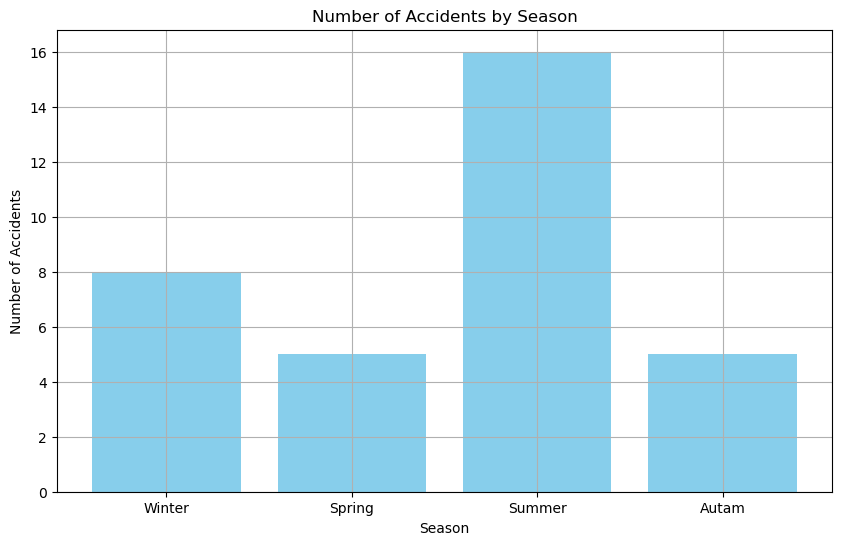

In [15]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'Season'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Verify the updated column names
print(df)  # Should now show the names with underscores

# Encode the categorical variable 'Season'
df['Season'] = df['Season'].astype('category')
df['Season_code'] = df['Season'].cat.codes

# Define the dependent variable (No_of_Accidents) and independent variable (Season_code)
X = df[['Season_code']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit the GLM model with Poisson family
model = sm.GLM(y, X, family=sm.families.Poisson())
results = model.fit()

# Print the summary of the model
print(results.summary())

# Extract and print model metrics
deviance = results.deviance
aic = results.aic
pseudo_r_squared = 1 - (deviance / results.null_deviance)
print(f"Deviance: {deviance}")
print(f"AIC: {aic}")
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Plotting the graphs

# Plot 1: Number of Accidents over Seasons
plt.figure(figsize=(10, 6))
plt.bar(df['Season'], df['No_of_Accidents'], color='skyblue')
plt.xlabel('Season')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Season')
plt.grid(True)
plt.savefig('accidents_by_season.png')
plt.show()


In [20]:
import os

def add_prefix_to_png_files(prefix='Q_'):
    # Get the current working directory
    folder_path = os.getcwd()
    
    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        # Check if the file has a .png extension
        if filename.endswith('.PNG'):
            # Define the new filename with the prefix
            new_filename = prefix + filename
            # Get the full path of the old and new filenames
            old_file_path = os.path.join(folder_path, filename)
            new_file_path = os.path.join(folder_path, new_filename)
            # Rename the file
            os.rename(old_file_path, new_file_path)
            print(f"Renamed '{filename}' to '{new_filename}'")

# Example usage:
add_prefix_to_png_files()


Renamed 'acds.PNG' to 'Q_acds.PNG'
Renamed 'acs.PNG' to 'Q_acs.PNG'
Renamed 'ads.PNG' to 'Q_ads.PNG'
Renamed 'ais.PNG' to 'Q_ais.PNG'
Renamed 'aliness.PNG' to 'Q_aliness.PNG'
Renamed 'als.PNG' to 'Q_als.PNG'
Renamed 'ancs.PNG' to 'Q_ancs.PNG'
Renamed 'ass.PNG' to 'Q_ass.PNG'
Renamed 'ats.PNG' to 'Q_ats.PNG'
Renamed 'atts.PNG' to 'Q_atts.PNG'


Index(['Year', 'No_of_Accidents', 'No_Damge_to_PR', 'Cause_Damge_to_PR',
       'Cost_of_Damage'],
      dtype='object')
Model 1: Cost of Damage vs. No of Accidents
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13.156
Date:                Mon, 05 Aug 2024   Deviance:                       5.2249
Time:                        12:07:46   Pearson chi2:                     5.08
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1387
Covariance Type:            nonrobust                                         
                     coef    std err         

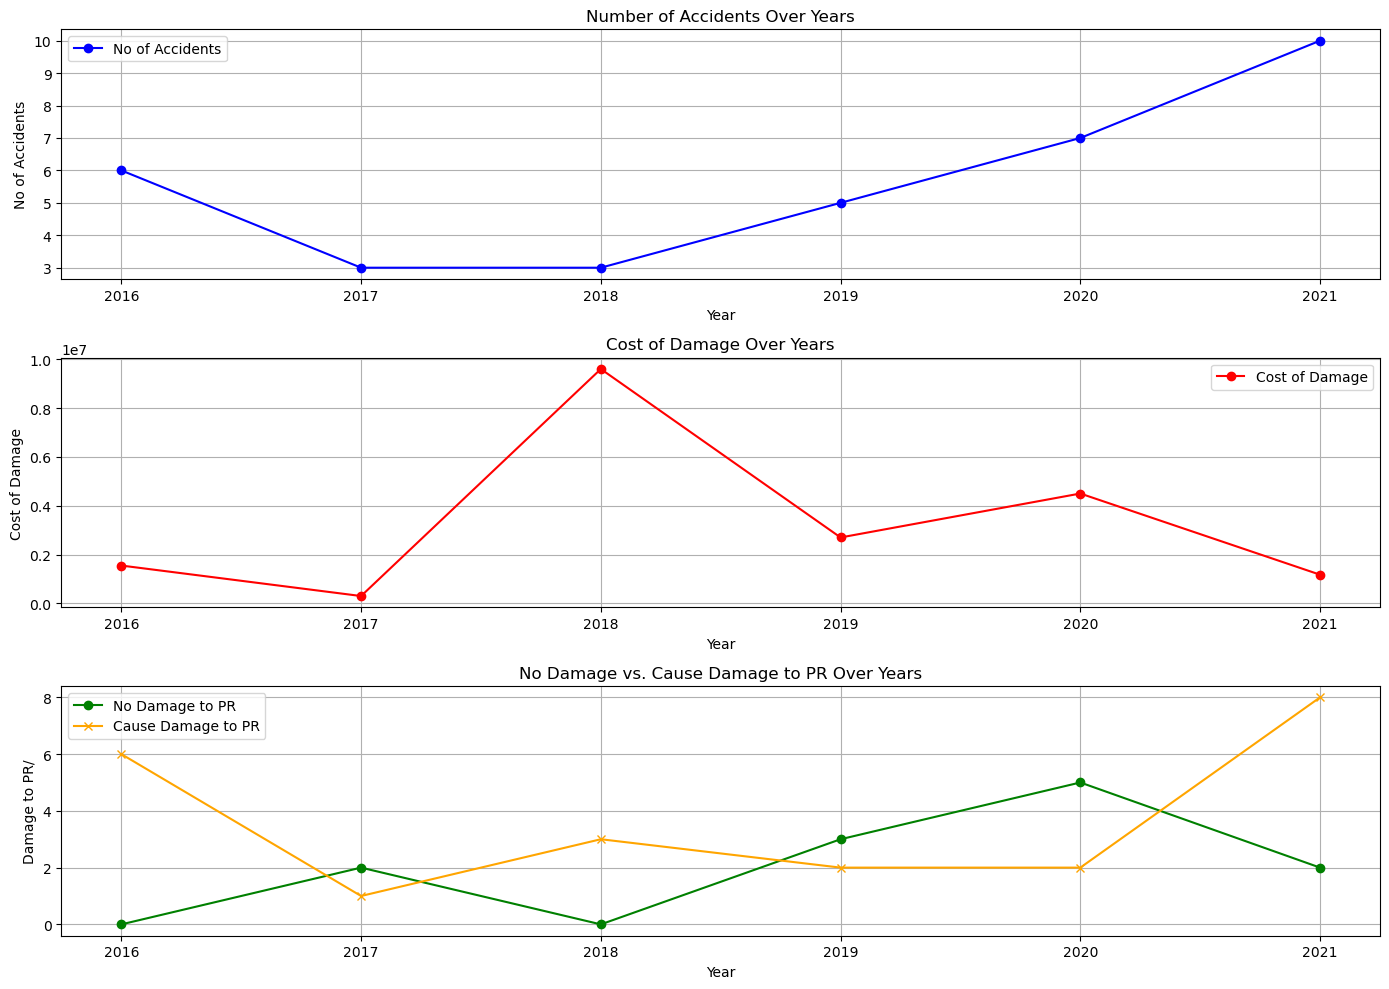

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'Cost of Damage'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Verify the updated column names
print(df.columns)  # Should now show the names with underscores

# Define the independent variable (Cost_of_Damage) and dependent variable (No_of_Accidents) for Model 1
X1 = df[['Cost_of_Damage']]
y1 = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X1 = sm.add_constant(X1)

# Fit the GLM model with Poisson family for Model 1
model1 = sm.GLM(y1, X1, family=sm.families.Poisson())
results1 = model1.fit()

# Print the summary of the model
print("Model 1: Cost of Damage vs. No of Accidents")
print(results1.summary())
print("Model 1 Metrics:")
print_metrics(results1)

# Define the independent variables (No_Damge_to_PR and Cause_Damge_to_PR) and dependent variable (No_of_Accidents) for Model 2
X2 = df[['No_Damge_to_PR', 'Cause_Damge_to_PR']]
y2 = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X2 = sm.add_constant(X2)

# Fit the GLM model with Poisson family for Model 2
model2 = sm.GLM(y2, X2, family=sm.families.Poisson())
results2 = model2.fit()

# Print the summary of the model
print("Model 2: No Damage to PR and Cause Damage to PR vs. No of Accidents")
print(results2.summary())

# Extract and print model metrics for each model
def print_metrics(results):
    deviance = results.deviance
    aic = results.aic
    pseudo_r_squared = 1 - (deviance / results.null_deviance)
    print(f"Deviance: {deviance}")
    print(f"AIC: {aic}")
    print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")


print("Model 2 Metrics:")
print_metrics(results2)

# Plotting the graphs

# Plot 1: Number of Accidents and Cost of Damage over Years
plt.figure(figsize=(14, 10))

# Number of Accidents
plt.subplot(3, 1, 1)
plt.plot(df['Year'], df['No_of_Accidents'], marker='o', label='No of Accidents', color='blue')
plt.xlabel('Year')
plt.ylabel('No of Accidents')
plt.title('Number of Accidents Over Years')
plt.grid(True)
plt.legend()

# Cost of Damage
plt.subplot(3, 1, 2)
plt.plot(df['Year'], df['Cost_of_Damage'], marker='o', label='Cost of Damage', color='red')
plt.xlabel('Year')
plt.ylabel('Cost of Damage')
plt.title('Cost of Damage Over Years')
plt.grid(True)
plt.legend()

# Comparisons
plt.subplot(3, 1, 3)
plt.plot(df['Year'], df['No_Damge_to_PR'], marker='o', label='No Damage to PR', color='green')
plt.plot(df['Year'], df['Cause_Damge_to_PR'], marker='x', label='Cause Damage to PR', color='orange')
plt.xlabel('Year')
plt.ylabel('Damage to PR/')
plt.title('No Damage vs. Cause Damage to PR Over Years')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('cost_of_damage_analysis.png')
plt.show()


Index(['Year', 'No_of_Accidents', 'No_Casualties', 'Casualties',
       'No_of_Deaths', 'No_of_Injuries'],
      dtype='object')

Model Summary for Number of Accidents:
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        1
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10.570
Date:                Mon, 05 Aug 2024   Deviance:                     0.053923
Time:                        12:44:02   Pearson chi2:                   0.0542
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6362
Covariance Type:            nonrobust                                         
                     coef    std err     

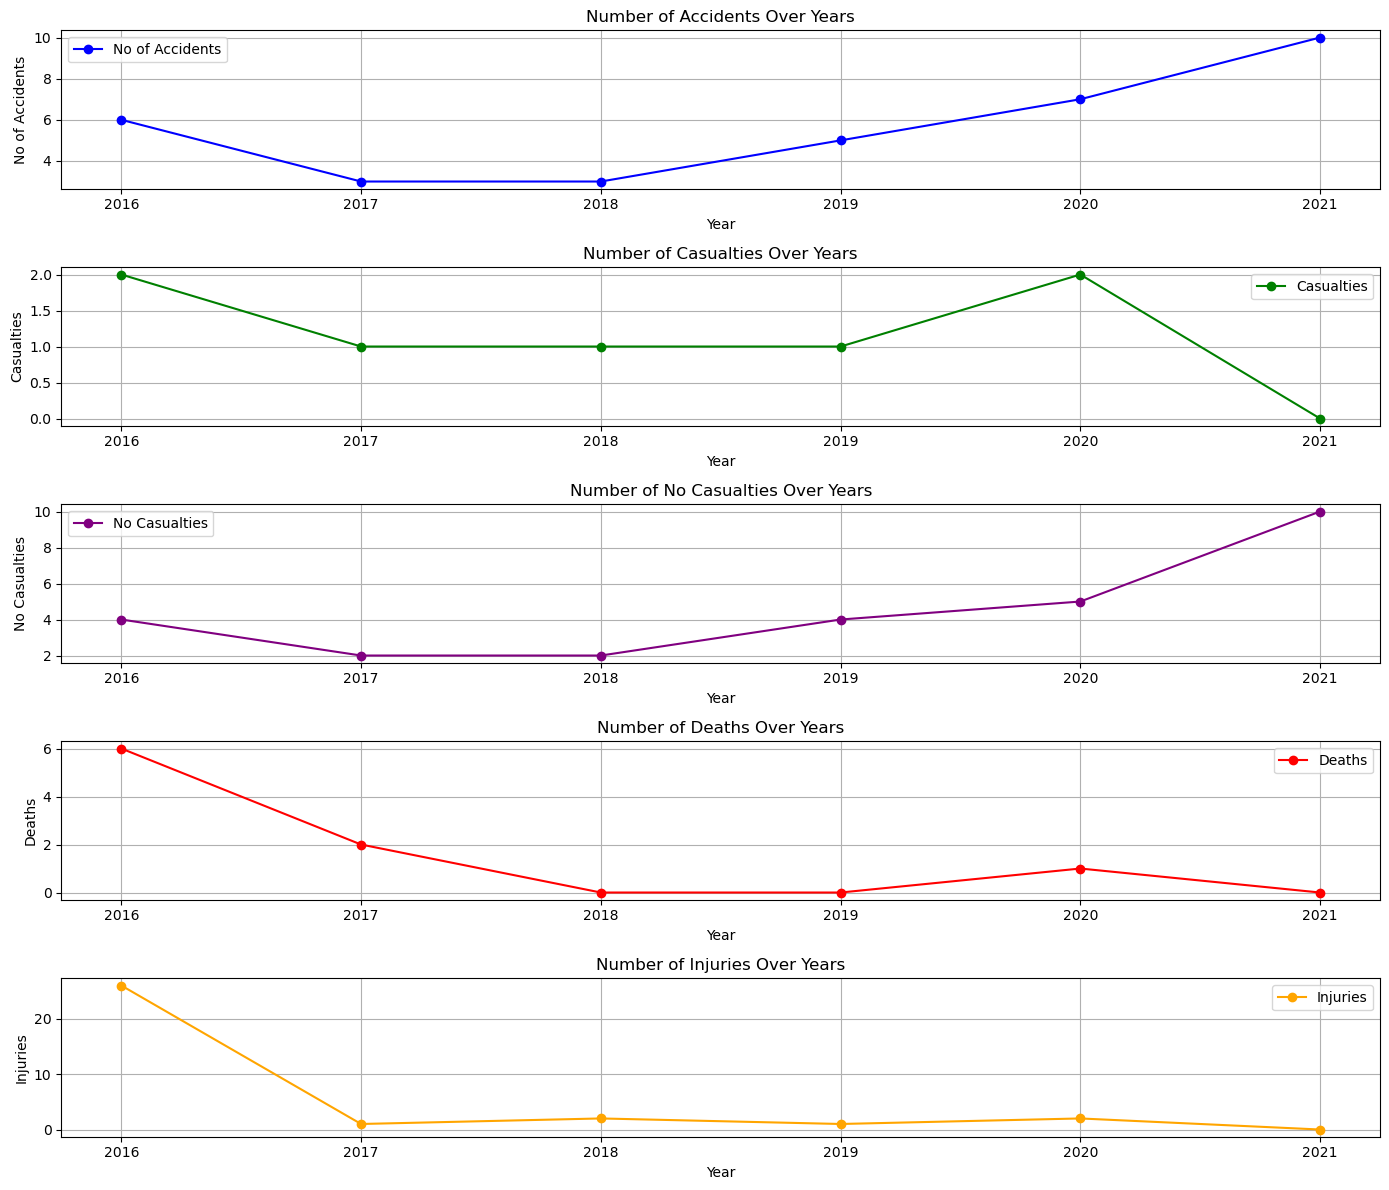

In [5]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'Severity'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rename columns to remove extra spaces and make them consistent
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Verify column names after renaming
print(df.columns)

# Define independent variables and dependent variable
X = df[['Casualties', 'No_Casualties', 'No_of_Deaths', 'No_of_Injuries']]
y = df['No_of_Accidents']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Fit GLM model
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the summary for the model
print("\nModel Summary for Number of Accidents:")
print(model.summary())

print(f"Deviance: {model.deviance}")
print(f"AIC: {model.aic}")
print(f"Log-Likelihood: {model.llf}")

# Plotting the graphs

# Plot 1: Number of Accidents, Casualties, Deaths, and Injuries over Years
plt.figure(figsize=(14, 12))

# Number of Accidents
plt.subplot(5, 1, 1)
plt.plot(df['Year'], df['No_of_Accidents'], marker='o', label='No of Accidents', color='blue')
plt.xlabel('Year')
plt.ylabel('No of Accidents')
plt.title('Number of Accidents Over Years')
plt.grid(True)
plt.legend()

# Number of Casualties
plt.subplot(5, 1, 2)
plt.plot(df['Year'], df['Casualties'], marker='o', label='Casualties', color='green')
plt.xlabel('Year')
plt.ylabel('Casualties')
plt.title('Number of Casualties Over Years')
plt.grid(True)
plt.legend()

# No Casualties
plt.subplot(5, 1, 3)
plt.plot(df['Year'], df['No_Casualties'], marker='o', label='No Casualties', color='purple')
plt.xlabel('Year')
plt.ylabel('No Casualties')
plt.title('Number of No Casualties Over Years')
plt.grid(True)
plt.legend()

# Number of Deaths
plt.subplot(5, 1, 4)
plt.plot(df['Year'], df['No_of_Deaths'], marker='o', label='Deaths', color='red')
plt.xlabel('Year')
plt.ylabel('Deaths')
plt.title('Number of Deaths Over Years')
plt.grid(True)
plt.legend()

# Number of Injuries
plt.subplot(5, 1, 5)
plt.plot(df['Year'], df['No_of_Injuries'], marker='o', label='Injuries', color='orange')
plt.xlabel('Year')
plt.ylabel('Injuries')
plt.title('Number of Injuries Over Years')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('severity_analysis_all.png')
plt.show()
